### Carga de liberías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data comprehension

In [5]:
df = pd.read_csv('C:\\Users\\walo1\\reservamos_api\\NOTEBOOKS\\rooms_data.csv')
df.head()

,url,title,price_per_night,currency,city,state,country,amenities,rating_cleanliness,rating_accuracy,rating_check_in,rating_communication,rating_location,rating_value,rating_overall,total_reviews,created_at
0,https://www.airbnb.mx/rooms/921201790656718448...,Cómodo cuarto en la Del Valle,550.0,MXN,Ciudad de México,Distrito Federal,México,"[""Ropa de cama incluida"", ""Caja de seguridad"",...",4.9,4.9,5.0,4.9,4.9,4.9,4.92,88,2025-01-27T13:39:48.130023
1,https://www.airbnb.mx/rooms/20591959?adults=1&...,Habitacion en Casa Sabina!!,428.0,MXN,Guadalajara,Jalisco,México,"[""Televisión"", ""Caja de seguridad"", ""Lavadora ...",4.7,4.8,4.9,4.8,4.9,4.7,4.71,717,2025-01-27T13:39:54.046532
2,https://www.airbnb.mx/rooms/31534932?adults=1&...,"Punta Alta, Refugio dentro de la Ciudad.",742.0,MXN,Guadalajara,Jalisco,México,"[""Aire acondicionado y calefacción"", ""Espacios...",NaN,NaN,NaN,NaN,NaN,NaN,4.81,258,2025-01-27T13:40:32.813918
3,https://www.airbnb.mx/rooms/100217845881523184...,Habitación en coto privado,230.0,MXN,Guadalajara,Jalisco,México,"[""Estacionamiento gratuito en las instalaciones""]",4.6,4.7,4.9,5.0,4.8,4.9,4.81,106,2025-01-27T13:40:39.807681
4,https://www.airbnb.mx/rooms/584270446306412779...,Mini suites impresionantes | Col. Roma,657.0,MXN,Ciudad de México,Distrito Federal,México,"[""Aire acondicionado y calefacción"", ""Lavadora...",NaN,NaN,NaN,NaN,NaN,NaN,4.44,586,2025-01-27T13:40:46.039264


In [6]:
df.columns

Index(['url', 'title', 'price_per_night', 'currency', 'city', 'state',
       'country', 'amenities', 'rating_cleanliness', 'rating_accuracy',
       'rating_check_in', 'rating_communication', 'rating_location',
       'rating_value', 'rating_overall', 'total_reviews', 'created_at'],
      dtype='object')

In [7]:
print("Shape:", df.shape)
print("Size:", df.size)

Shape: (71, 17)
Size: 1207


In [8]:
df.describe()

,price_per_night,rating_cleanliness,rating_accuracy,rating_check_in,rating_communication,rating_location,rating_value,rating_overall,total_reviews
count,71.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,71.000000,71.000000
mean,658.690141,4.831429,4.840000,4.854286,4.857143,4.854286,4.802857,4.820563,155.380282
std,352.046936,0.154865,0.121752,0.119663,0.159569,0.126823,0.129446,0.149178,153.751039
min,207.000000,4.300000,4.500000,4.500000,4.300000,4.500000,4.400000,4.350000,3.000000
25%,399.500000,4.750000,4.800000,4.800000,4.800000,4.800000,4.700000,4.750000,52.000000
50%,621.000000,4.900000,4.900000,4.900000,4.900000,4.900000,4.800000,4.860000,110.000000
75%,820.500000,4.900000,4.900000,4.900000,5.000000,4.950000,4.900000,4.930000,210.000000
max,2000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,717.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   71 non-null     object 
 1   title                 71 non-null     object 
 2   price_per_night       71 non-null     float64
 3   currency              71 non-null     object 
 4   city                  71 non-null     object 
 5   state                 71 non-null     object 
 6   country               71 non-null     object 
 7   amenities             71 non-null     object 
 8   rating_cleanliness    35 non-null     float64
 9   rating_accuracy       35 non-null     float64
 10  rating_check_in       35 non-null     float64
 11  rating_communication  35 non-null     float64
 12  rating_location       35 non-null     float64
 13  rating_value          35 non-null     float64
 14  rating_overall        71 non-null     float64
 15  total_reviews         71 

# Data cleaning

## Tratamiento de valores nulos

In [10]:
df.isnull().sum()

url                      0
title                    0
price_per_night          0
currency                 0
city                     0
state                    0
country                  0
amenities                0
rating_cleanliness      36
rating_accuracy         36
rating_check_in         36
rating_communication    36
rating_location         36
rating_value            36
rating_overall           0
total_reviews            0
created_at               0
dtype: int64

### Exploración de los datos

Definir si el rating_overall es el promedio de los 6 ratings.

Metodología:

Hacer el cálculo del valor promedio entre los valores de las columnas: rating_cleanliness, rating_accuracy, rating_check_in, rating_communication, rating_location y rating_value.
Redondear los valores a dos cifras después del punto.
Comparar el resultado del cálculo del promedio de las 6 columnas con la columna rating_overall.
Generar una columna llamada "Respuesta" en donde se almacene un "sí" en donde ambos valores sean iguales y un "no" en donde los valores no coincidan.

In [14]:
def process_dataframe(file_path):
    df = pd.read_csv(file_path)

    rating_columns = [
        "rating_cleanliness", "rating_accuracy", "rating_check_in",
        "rating_communication", "rating_location", "rating_value"
    ]

    df["rating_avg_original"] = df[rating_columns].mean(axis=1)

    df["rating_avg_original"].fillna(0, inplace=True)
    df["rating_overall"].fillna(0, inplace=True)

    df["rating_avg"] = df["rating_avg_original"].apply(lambda x: round(x, 2) if int(x * 1000) % 10  <= 5 else round(x + 0.005, 2))

    df = df[df["rating_avg"] != 0.0]


    df["Respuesta"] = df["rating_avg"] == df["rating_overall"]
    df["Respuesta"] = df["Respuesta"].map({True: "sí", False: "no"})

    respuesta_counts = df["Respuesta"].value_counts()
    print(respuesta_counts)

    return df[["rating_avg_original", "rating_avg", "rating_overall", "Respuesta"]]

file_path = "C:\\Users\\walo1\\reservamos_api\\NOTEBOOKS\\rooms_data.csv"

df_processed = process_dataframe(file_path)
df_processed

Respuesta
no    32
sí     3
Name: count, dtype: int64


C:\Users\walo1\AppData\Local\Temp\ipykernel_11940\3006005004.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating_avg_original"].fillna(0, inplace=True)
C:\Users\walo1\AppData\Local\Temp\ipykernel_11940\3006005004.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,rating_avg_original,rating_avg,rating_overall,Respuesta
0,4.916667,4.92,4.92,sí
1,4.800000,4.80,4.71,no
3,4.816667,4.82,4.81,no
6,4.783333,4.78,4.82,no
8,4.933333,4.93,4.97,no
10,4.800000,4.80,4.77,no
11,4.866667,4.87,4.91,no
13,4.650000,4.65,4.56,no
14,4.700000,4.70,4.66,no
17,4.916667,4.92,4.92,sí


Se concluye de la primer exploración que el valor declarado en la columna "rating_overall" no se obtiene por el promedio de los valores de las 6 columnas.

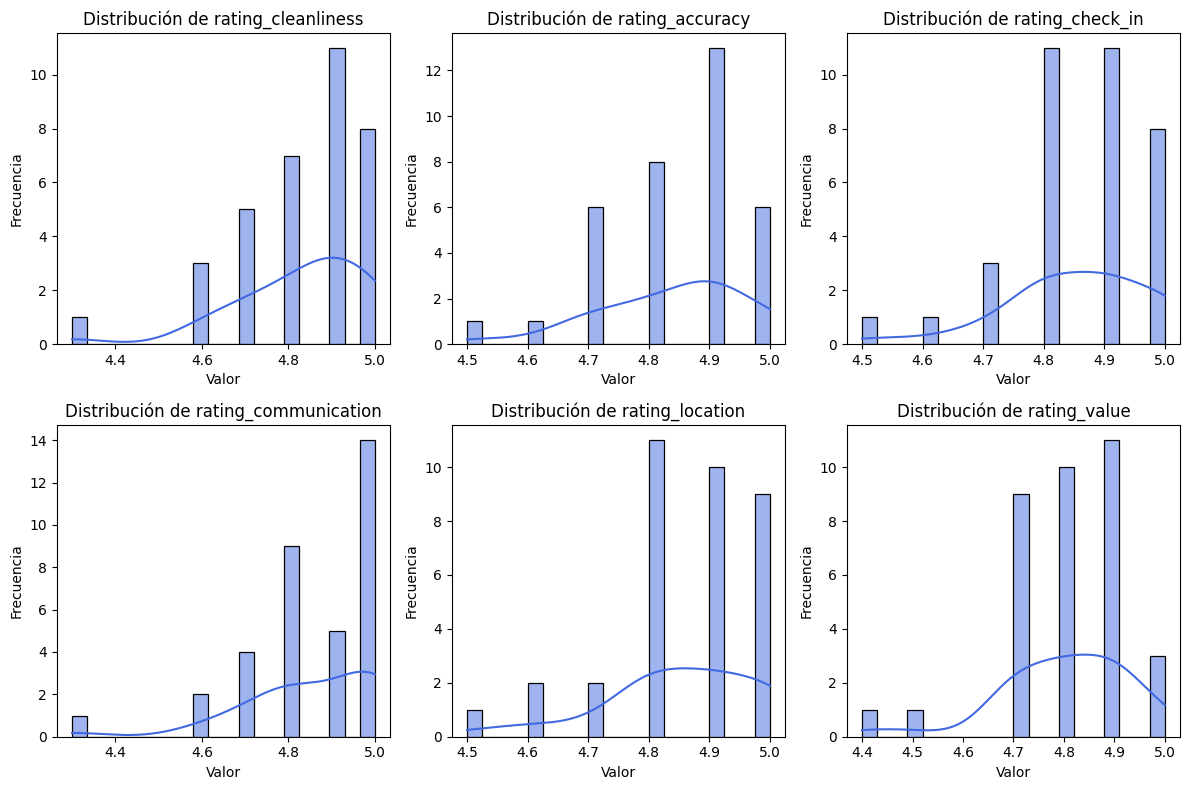

,Media,Mediana,Moda
rating_cleanliness,4.831429,4.9,4.9
rating_accuracy,4.840000,4.9,4.9
rating_check_in,4.854286,4.9,4.8
rating_communication,4.857143,4.9,5.0
rating_location,4.854286,4.9,4.8
rating_value,4.802857,4.8,4.9


In [15]:
rating_columns = [
    "rating_cleanliness", "rating_accuracy", "rating_check_in",
    "rating_communication", "rating_location", "rating_value"
]

plt.figure(figsize=(12, 8))

for i, col in enumerate(rating_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col][df[col].notna()], bins=20, kde=True, color="royalblue")
    plt.title(f"Distribución de {col}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

stats = {}

for col in rating_columns:
    col_values = df[col][df[col].notna()]  # Ignorar NaNs usando notna()
    stats[col] = {
        "Media": col_values.mean(),
        "Mediana": col_values.median(),
        "Moda": col_values.mode()[0] if not col_values.mode().empty else None
    }

stats_df = pd.DataFrame(stats).T
stats_df

Se concluye de la segunda exploración lo siguiente:

* Las distribuciones de los datos no son normales
* Es óptimo utilizar la Mediana para no considerar los outliers.
* La distribución de la columna "rating_accuracy" es la más cercana a la normal, por lo que sí es conveniente utilizar el valor de la media.

rating_cleanliness usar mediana para indexar valores nulos: 4.9

rating_accuracy usar media para indexar valores nulos: 4.8

rating_check_in usar mediana para indexar valores nulos: 4.9

rating_communication usar mediana para indexar valores nulos: 4.9

rating_location usar usar mediana para indexar valores nulos: 4.9

rating_value usar usar mediana para indexar valores nulos: 4.8

In [16]:
df["rating_cleanliness"].fillna(4.9, inplace=True)
df["rating_accuracy"].fillna(4.8, inplace=True)
df["rating_check_in"].fillna(4.9, inplace=True)
df["rating_communication"].fillna(4.9, inplace=True)
df["rating_location"].fillna(4.9, inplace=True)
df["rating_value"].fillna(4.8, inplace=True)

df

C:\Users\walo1\AppData\Local\Temp\ipykernel_11940\2903183781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rating_cleanliness"].fillna(4.9, inplace=True)
C:\Users\walo1\AppData\Local\Temp\ipykernel_11940\2903183781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,url,title,price_per_night,currency,city,state,country,amenities,rating_cleanliness,rating_accuracy,rating_check_in,rating_communication,rating_location,rating_value,rating_overall,total_reviews,created_at
0,https://www.airbnb.mx/rooms/921201790656718448...,Cómodo cuarto en la Del Valle,550.0,MXN,Ciudad de México,Distrito Federal,México,"[""Ropa de cama incluida"", ""Caja de seguridad"",...",4.9,4.9,5.0,4.9,4.9,4.9,4.92,88,2025-01-27T13:39:48.130023
1,https://www.airbnb.mx/rooms/20591959?adults=1&...,Habitacion en Casa Sabina!!,428.0,MXN,Guadalajara,Jalisco,México,"[""Televisión"", ""Caja de seguridad"", ""Lavadora ...",4.7,4.8,4.9,4.8,4.9,4.7,4.71,717,2025-01-27T13:39:54.046532
2,https://www.airbnb.mx/rooms/31534932?adults=1&...,"Punta Alta, Refugio dentro de la Ciudad.",742.0,MXN,Guadalajara,Jalisco,México,"[""Aire acondicionado y calefacción"", ""Espacios...",4.9,4.8,4.9,4.9,4.9,4.8,4.81,258,2025-01-27T13:40:32.813918
3,https://www.airbnb.mx/rooms/100217845881523184...,Habitación en coto privado,230.0,MXN,Guadalajara,Jalisco,México,"[""Estacionamiento gratuito en las instalaciones""]",4.6,4.7,4.9,5.0,4.8,4.9,4.81,106,2025-01-27T13:40:39.807681
4,https://www.airbnb.mx/rooms/584270446306412779...,Mini suites impresionantes | Col. Roma,657.0,MXN,Ciudad de México,Distrito Federal,México,"[""Aire acondicionado y calefacción"", ""Lavadora...",4.9,4.8,4.9,4.9,4.9,4.8,4.44,586,2025-01-27T13:40:46.039264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,https://www.airbnb.mx/rooms/32475052?adults=1&...,Conchita’s house: Hermoso apartamento en el ce...,850.0,MXN,San Miguel de Allende,Guanajuato,México,"[""Ropa de cama incluida"", ""Aire acondicionado ...",4.9,4.8,4.9,4.9,4.9,4.8,4.95,393,2025-01-27T13:50:53.257537
67,https://www.airbnb.mx/rooms/33947634?adults=1&...,Mini Departamento céntrico con buena vista,607.0,MXN,Toluca,México,México,"[""Aire acondicionado y calefacción"", ""Estacion...",4.9,4.8,4.9,4.9,4.9,4.8,4.93,238,2025-01-27T13:50:59.356549
68,https://www.airbnb.mx/rooms/133067445957917366...,Habitación en metepec pueblito mágico,300.0,MXN,Toluca,México,México,"[""Caja de seguridad"", ""Estacionamiento gratuit...",4.9,4.8,4.9,4.9,4.9,4.8,5.00,3,2025-01-27T13:51:06.787364
69,https://www.airbnb.mx/rooms/42120684?adults=1&...,Mini departamento equipado todos los servicios,334.0,MXN,Toluca,México,México,"[""Ropa de cama incluida""]",4.9,4.9,5.0,5.0,4.8,4.8,4.84,160,2025-01-27T13:51:12.778458


### Descarga de nuevo dataset

In [ ]:
# df.to_csv('/RUTA/CLEAN_DATA.csv', index=False)